In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.notebook import tqdm
from google.colab import drive
import os

tqdm.pandas()

In [5]:
drive.mount('/content/drive')
os.chdir("/content/drive/MyDrive/Capstone_project/")

Mounted at /content/drive


## Load original data & functions

In [6]:
train_df = pd.read_csv("SBIC.v2.agg.trn.csv")
val_df = pd.read_csv("SBIC.v2.agg.dev.csv")

In [37]:
def merge_dy_origin(train_dy, origin_data):
  train_dy_metrics_off = train_dy.merge(origin_data["offensiveYN"], left_on="guid", right_on=origin_data["offensiveYN"].index)
  train_dy_metrics_off["abs_offensiveYN"] = train_dy_metrics_off["offensiveYN"].apply(lambda x : abs(x-0.5))
  return train_dy_metrics_off

def split_data(data):
  df = data.copy()
  df_n_samples = int(len(df)/3)

  easy_df = df.sort_values(by=["confidence"],ascending=False)[:df_n_samples].copy()
  not_easy_df = df.sort_values(by=["confidence"],ascending=False)[df_n_samples:].copy()
  ambiguous_df = not_easy_df.sort_values(by=["variability"],ascending=False)[:df_n_samples].copy()
  hard_df = not_easy_df.sort_values(by=["variability"],ascending=False)[df_n_samples:].copy()
  print("Average agreement of easy : {:0.2f} , variance {:0.2f}".format(easy_df["abs_offensiveYN"].mean(), 
                                                                        easy_df["abs_offensiveYN"].var()))
  print("Average agreement of ambiguous : {:0.2f} , variance {:0.2f}".format(ambiguous_df["abs_offensiveYN"].mean(), 
                                                                             ambiguous_df["abs_offensiveYN"].var()))
  print("Average agreement of hard : {:0.2f} , variance {:0.2f}".format(hard_df["abs_offensiveYN"].mean(), 
                                                                        hard_df["abs_offensiveYN"].var()))
  return easy_df, ambiguous_df, hard_df
  
def load_data(path):
  data = pd.read_csv(os.path.join(path, "data.csv"))
  train_dy = pd.read_csv(os.path.join(path, "train_dy_metrics.csv"))
  df = merge_dy_origin(train_dy, data)
  return df

In [ ]:
# Will remove if not needed

# def plot_distribution(df):
#   fig, ax = plt.subplots(1, 2)
#   fig.set_figheight(5)
#   fig.set_figwidth(8)
#   fig.tight_layout()
#   ax[0].set_title('Confidence distribution')
#   sns.histplot(x=df["confidence"], ax=ax[0])
#   ax[1].set_title('Variability distribution')
#   sns.histplot(x=df["variability"], ax=ax[1])
#   plt.show()

# def plot_boxplot(df):
#   confidence_data = df.groupby("abs_offensiveYN")["confidence"].apply(list).reset_index(name="agreement")
#   var_data = df.groupby("abs_offensiveYN")["variability"].apply(list).reset_index(name="agreement")
#   fig, ax = plt.subplots(1, 2)
#   fig.set_figheight(5)
#   fig.set_figwidth(10)
#   fig.tight_layout()
#   ax[0].set_title('Agreement - Confidence correlation')
#   ax[0].boxplot(x=confidence_data["agreement"])
#   ax[1].set_title('Agreement -Variability correlation')
#   ax[1].boxplot(x=var_data["agreement"])
#   plt.xlabel("Agreement Level")
#   plt.show()

In [8]:
def plot_distribution(easy, ambiguous, hard):
  fig = plt.figure()
  fig.set_figheight(5)
  fig.set_figwidth(10)
  fig.tight_layout()
  plt.boxplot(x=[easy["abs_offensiveYN"], ambiguous["abs_offensiveYN"], hard["abs_offensiveYN"]])
  plt.xticks([1,2,3], ["easy", "ambiguous", "hard"])
  plt.ylabel("Agreement")
  fig, ax = plt.subplots(1, 3)
  fig.set_figheight(5)
  fig.set_figwidth(10)
  fig.tight_layout()
  sns.histplot(data=easy, x="abs_offensiveYN", ax=ax[0])
  ax[0].set_title("easy")
  sns.histplot(data=ambiguous, x="abs_offensiveYN", ax=ax[1])
  ax[1].set_title("ambiguous")
  sns.histplot(data=hard, x="abs_offensiveYN", ax=ax[2])
  ax[2].set_title("hard")
  plt.show()

In [13]:
def plot_corr_plot(easy_df, amb_df, hard_df):
  df_list = [easy_df, amb_df, hard_df]
  fig, ax = plt.subplots(1, 2)
  fig.set_figheight(5)
  fig.set_figwidth(10)
  fig.tight_layout()
  ax[0].set_xlabel("Agreement Level")
  ax[0].set_title('Agreement - Confidence correlation')
  ax[1].set_xlabel("Agreement Level")
  ax[1].set_title('Agreement -Variability correlation')
  conf_list = []
  var_list = []
  for data in df_list:
    df = data.copy()
    med_value = df["abs_offensiveYN"].median()
    df["over_median_agreement"] = df["abs_offensiveYN"].apply(lambda x : 1 if x >= med_value else 0)
    confidence_data = df.groupby("over_median_agreement")["confidence"].apply(list).reset_index(name="confidence")
    var_data = df.groupby("over_median_agreement")["variability"].apply(list).reset_index(name="variability")
    conf_list += confidence_data["confidence"].tolist()
    var_list += var_data["variability"].tolist()

  ax[0].boxplot(conf_list)
  ax[1].boxplot(var_list)
  ax[0].tick_params(labelsize=5)
  ax[1].tick_params(labelsize=5)
  plt.setp(ax, xticks=[1,2,3,4,5,6], xticklabels=["below easy", "above easy", "below amb", "above amb", 
                                                  "below hard", "above mhard"])
  plt.show()

# Correlation between metrics and agreement-level

## Overall Datamap

In [ ]:
overall_train_dy = pd.read_csv("train_dy_metrics.csv")
overall_train_df = merge_dy_origin(overall_train_dy, train_df)

In [23]:
easy, ambiguous, hard = split_data(overall_train_df)

Average agreement of easy : 0.44 , variance 0.02
Average agreement of ambiguous : 0.38 , variance 0.03
Average agreement of hard : 0.37 , variance 0.03


In [12]:
print("Average agreement of easy : {:0.2f} , variance {:0.2f}".format(easy["abs_offensiveYN"].mean(), easy["abs_offensiveYN"].var()))
print("Average agreement of ambiguous : {:0.2f} , variance {:0.2f}".format(ambiguous["abs_offensiveYN"].mean(), ambiguous["abs_offensiveYN"].var()))
print("Average agreement of hard : {:0.2f} , variance {:0.2f}".format(hard["abs_offensiveYN"].mean(), hard["abs_offensiveYN"].var()))

Average agreement of easy : 0.44 , variance 0.02
Average agreement of ambiguous : 0.38 , variance 0.03
Average agreement of hard : 0.37 , variance 0.03


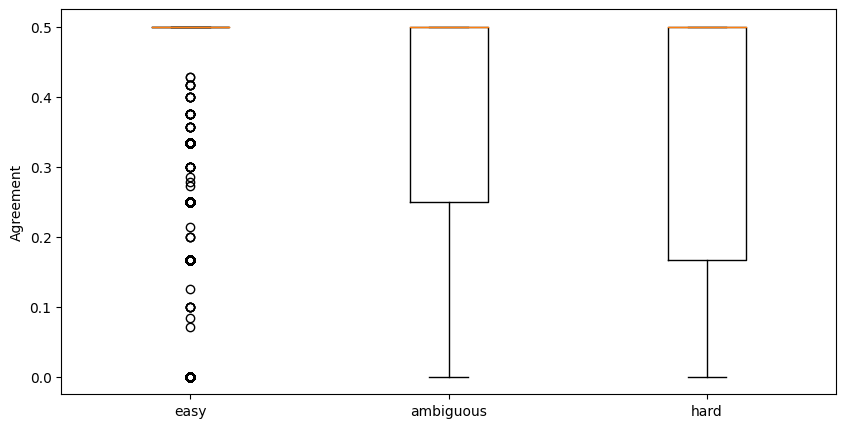

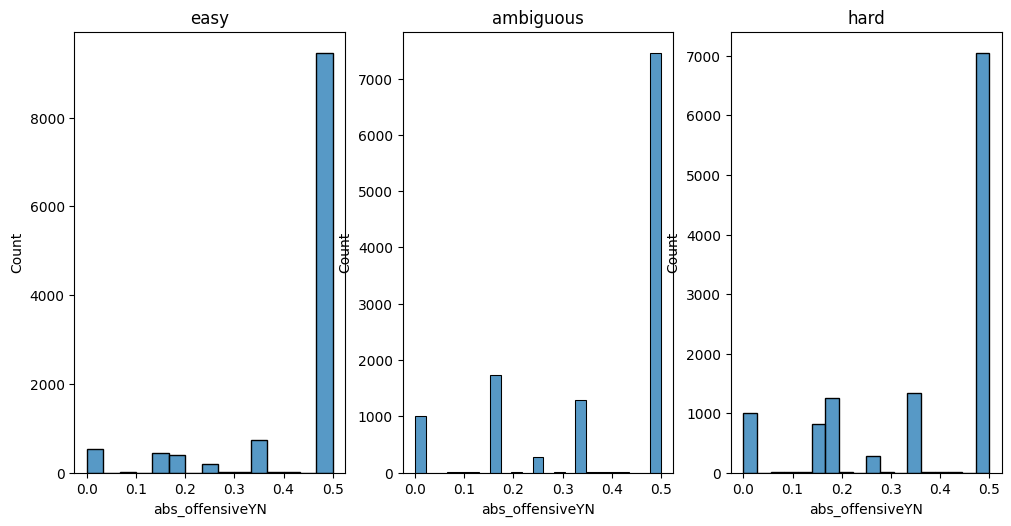

In [14]:
plot_distribution(easy, ambiguous, hard)

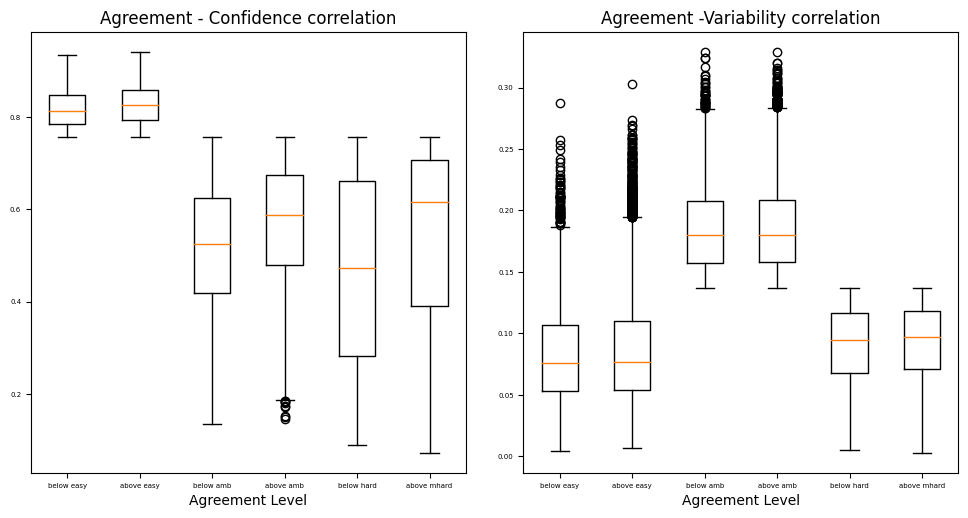

In [15]:
plot_corr_plot(easy, ambiguous, hard)

## Easy Datamap

In [39]:
easy_df = load_data("output/easy")
easy_easy, easy_amb, easy_hard = split_data(easy_df)

Average agreement of easy : 0.45 , variance 0.02
Average agreement of ambiguous : 0.43 , variance 0.02
Average agreement of hard : 0.44 , variance 0.02


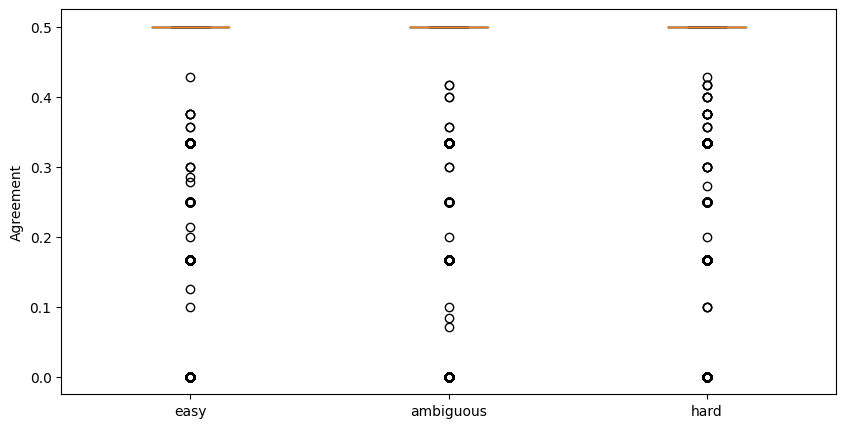

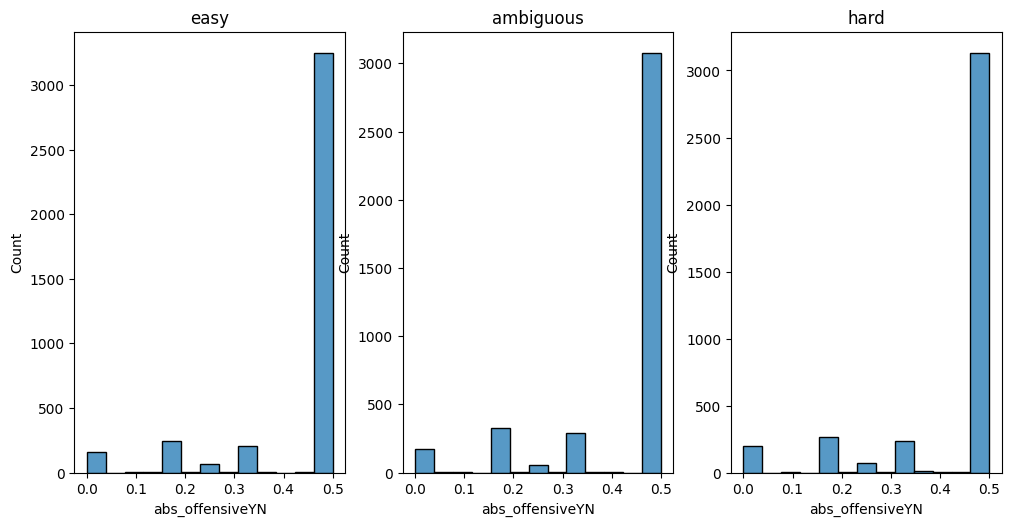

In [40]:
plot_distribution(easy_easy, easy_amb, easy_hard)

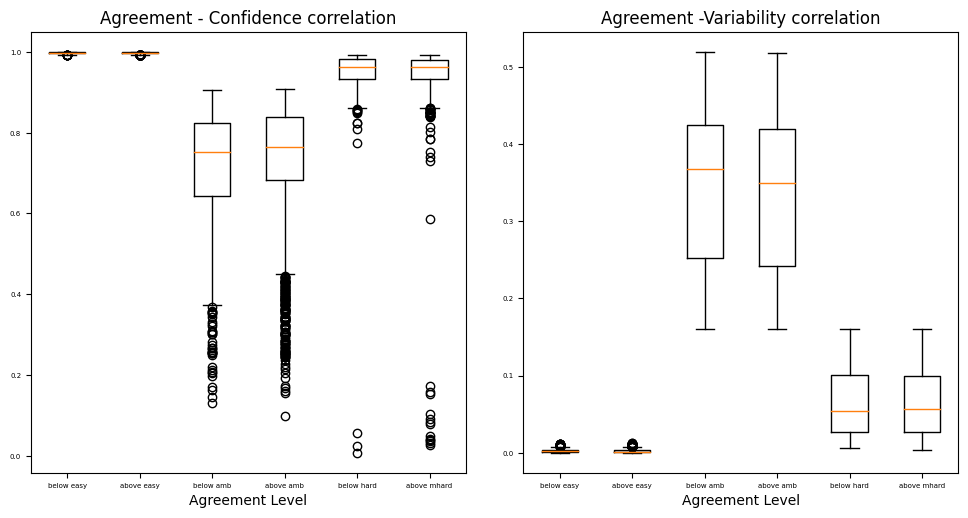

In [42]:
plot_corr_plot(easy_easy, easy_amb, easy_hard)

## Ambiguous Datamap

In [41]:
amb_df = load_data("output/ambiguous")
amb_easy, amb_amb, amb_hard = split_data(amb_df)

Average agreement of easy : 0.38 , variance 0.03
Average agreement of ambiguous : 0.39 , variance 0.03
Average agreement of hard : 0.39 , variance 0.03


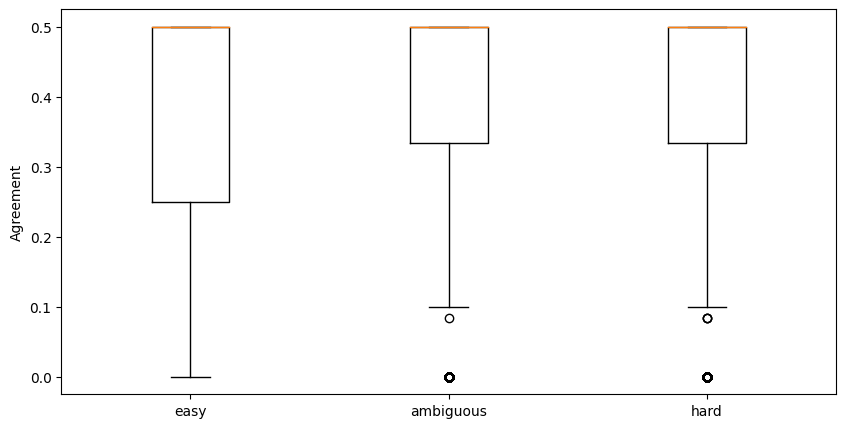

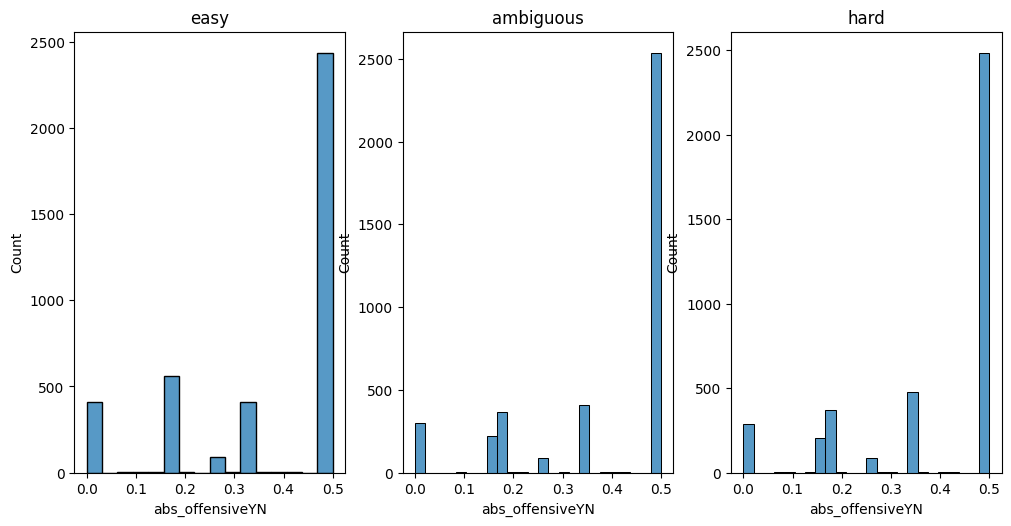

In [31]:
plot_distribution(amb_easy, amb_amb, amb_hard)

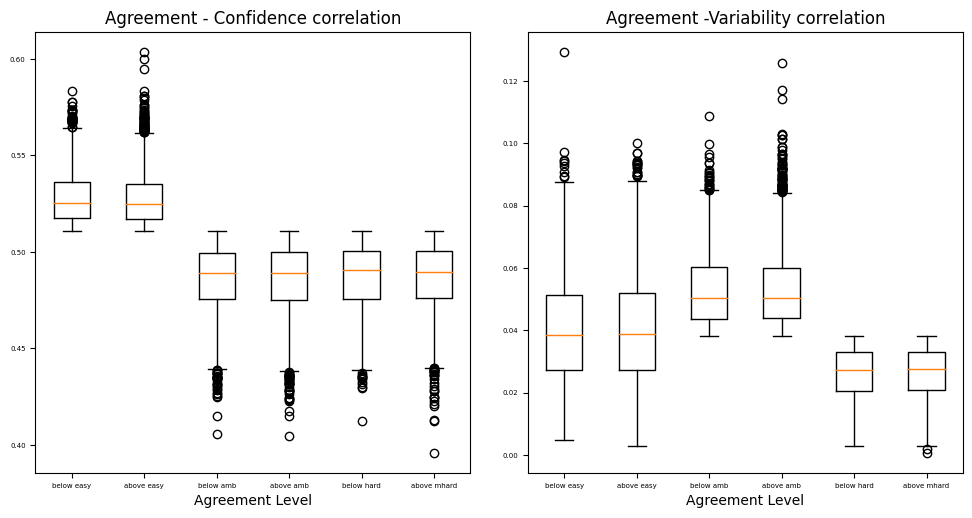

In [33]:
plot_corr_plot(amb_easy, amb_amb, amb_hard)

## Hard Datamap

In [43]:
hard_df = load_data("output/hard")
hard_easy, hard_amb, hard_hard = split_data(hard_df)

Average agreement of easy : 0.37 , variance 0.03
Average agreement of ambiguous : 0.38 , variance 0.03
Average agreement of hard : 0.37 , variance 0.03


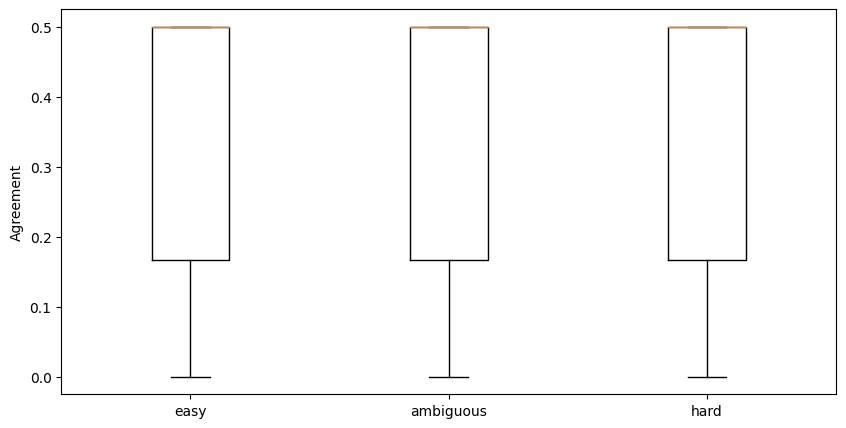

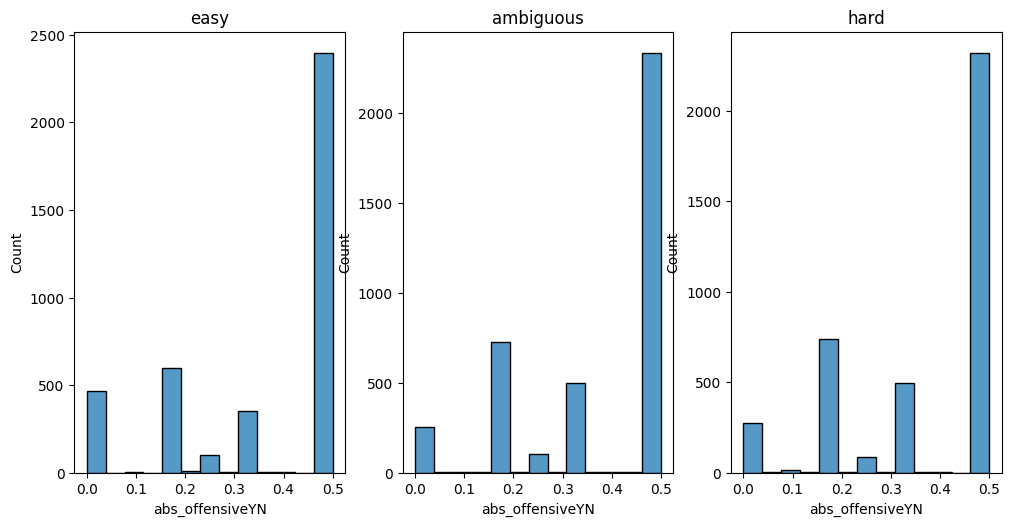

In [44]:
plot_distribution(hard_easy, hard_amb, hard_hard)

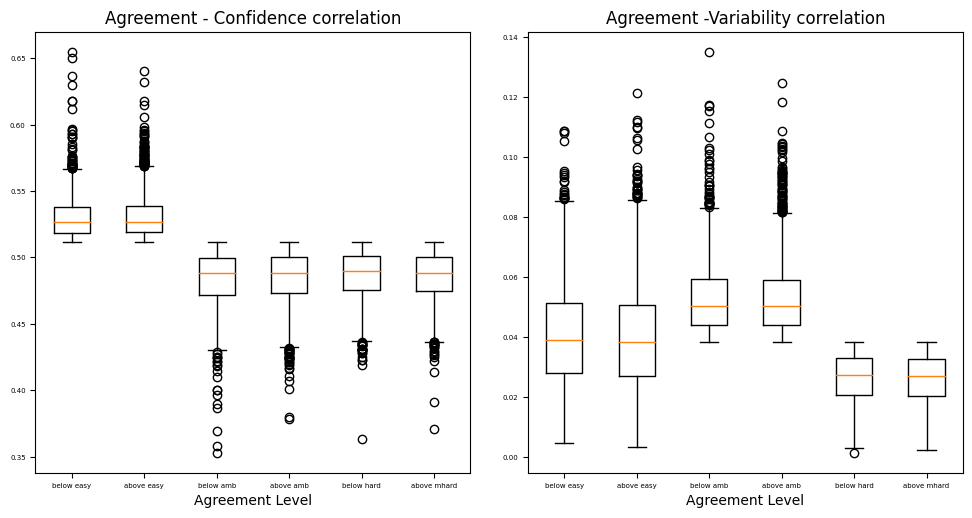

In [45]:
plot_corr_plot(hard_easy, hard_amb, hard_hard)

# Save spilt data from Overall Datamap

In [46]:
overall_train_dy = pd.read_csv("train_dy_metrics.csv")
overall_train_df = merge_dy_origin(overall_train_dy, train_df)

In [53]:
easy, ambiguous, hard = split_data(overall_train_df)

Average agreement of easy : 0.44 , variance 0.02
Average agreement of ambiguous : 0.38 , variance 0.03
Average agreement of hard : 0.37 , variance 0.03


In [55]:
def save_split_data(easy_df, amb_df, hard_df):
  df_list = [easy_df, amb_df, hard_df]
  name_list= ["easy", "ambiguous", "hard"]
  for data, name in zip(df_list, name_list):
    df = data.copy()
    med_value = df["abs_offensiveYN"].median()
    df["over_median_agreement"] = df["abs_offensiveYN"].apply(lambda x : 1 if x >= med_value else 0)
    below_df = df[df["over_median_agreement"]==0].reset_index(drop=True)
    above_df = df[df["over_median_agreement"]==1].reset_index(drop=True)
    below_df.to_csv("{}_below.csv".format(name))
    above_df.to_csv("{}_above.csv".format(name))

In [56]:
save_split_data(easy, ambiguous, hard)